<a href="https://colab.research.google.com/github/reeda23/Deep-Learning-With-Pytorch/blob/main/6.Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

**Training Pipeline** <br>
1) Design model (input, output size, forward pass)<br>
2) Construct loss and optimizer <br>
3) Training loop <br>


> -forward pass: compute prediction and loss <br>
  -backward pass: compute gradients <br>
  -update weights <br>




In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# step 0 is preparing data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

3 step process <br>

1) define model <br>
2) define loss and optimizer <br>
3) training loop

In [3]:
#1. model 
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)


In [4]:
#2. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
#3. training loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    #backward pass
    loss.backward()

    #update
    optimizer.step()
    
    optimizer.zero_grad()

    if epoch % 1 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 1, loss = 5685.6582
epoch: 2, loss = 5515.8462
epoch: 3, loss = 5351.4712
epoch: 4, loss = 5192.3594
epoch: 5, loss = 5038.3374
epoch: 6, loss = 4889.2427
epoch: 7, loss = 4744.9146
epoch: 8, loss = 4605.2002
epoch: 9, loss = 4469.9487
epoch: 10, loss = 4339.0171
epoch: 11, loss = 4212.2666
epoch: 12, loss = 4089.5610
epoch: 13, loss = 3970.7705
epoch: 14, loss = 3855.7686
epoch: 15, loss = 3744.4329
epoch: 16, loss = 3636.6462
epoch: 17, loss = 3532.2935
epoch: 18, loss = 3431.2642
epoch: 19, loss = 3333.4521
epoch: 20, loss = 3238.7529
epoch: 21, loss = 3147.0669
epoch: 22, loss = 3058.2969
epoch: 23, loss = 2972.3501
epoch: 24, loss = 2889.1350
epoch: 25, loss = 2808.5637
epoch: 26, loss = 2730.5525
epoch: 27, loss = 2655.0188
epoch: 28, loss = 2581.8826
epoch: 29, loss = 2511.0674
epoch: 30, loss = 2442.4990
epoch: 31, loss = 2376.1052
epoch: 32, loss = 2311.8167
epoch: 33, loss = 2249.5657
epoch: 34, loss = 2189.2876
epoch: 35, loss = 2130.9189
epoch: 36, loss = 2074.3987
e

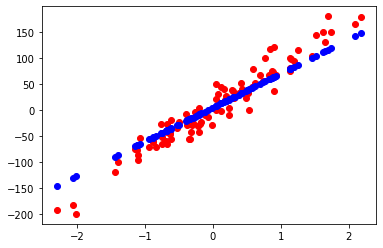

In [6]:
#plotting

predicted = model(X).detach().numpy() #this is new tensor we don't want to include this info in computational graph
plt.plot(X_numpy, y_numpy,'ro')
plt.plot(X_numpy, predicted, 'bo')
plt.show()
